In [1]:
#Outlier Impact

R-squared with Outliers: 0.9994
R-squared without Outliers: 0.9994
RMSE with Outliers: 2.7596
RMSE without Outliers: 2.6600


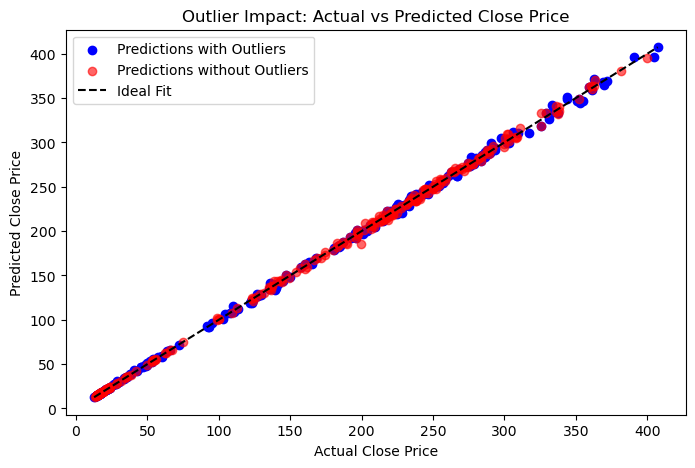

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

file_path = "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"
df = pd.read_csv(file_path, skiprows=1)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = df.iloc[1:].reset_index(drop=True)

df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)
df["Date"] = pd.to_datetime(df["Date"])

X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Detecting Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
X_no_outliers = df_no_outliers[["Open", "High", "Low", "Volume"]]
y_no_outliers = df_no_outliers["Close"]

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Linear Regression with Outliers
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_with_outliers = linear_model.predict(X_test)

# Linear Regression without Outliers
linear_model_no_outliers = LinearRegression()
linear_model_no_outliers.fit(X_train_no, y_train_no)
y_pred_without_outliers = linear_model_no_outliers.predict(X_test_no)

# Model Performance Evaluation
r2_with_outliers = r2_score(y_test, y_pred_with_outliers)
r2_without_outliers = r2_score(y_test_no, y_pred_without_outliers)
rmse_with_outliers = np.sqrt(mean_squared_error(y_test, y_pred_with_outliers))
rmse_without_outliers = np.sqrt(mean_squared_error(y_test_no, y_pred_without_outliers))

print(f"R-squared with Outliers: {r2_with_outliers:.4f}")
print(f"R-squared without Outliers: {r2_without_outliers:.4f}")
print(f"RMSE with Outliers: {rmse_with_outliers:.4f}")
print(f"RMSE without Outliers: {rmse_without_outliers:.4f}")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_with_outliers, color='blue', label='Predictions with Outliers')
plt.scatter(y_test_no, y_pred_without_outliers, color='red', label='Predictions without Outliers', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Ideal Fit')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Outlier Impact: Actual vs Predicted Close Price")
plt.legend()
plt.show()
